<a href="https://colab.research.google.com/github/carmeniturbe/ejercicios_adv_machine_learning/blob/main/01_KMeans_Find_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea
La tarea es realizar la segmentación del cliente utilizando k-medias Estamos interesados en agrupar a nuestros clientes en grupos con características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de manera eficaz. Utilizaremos la edad del cliente, su educación, sus años de trabajo, sus ingresos, sus deudas, si ha incumplido o no y su deuda a la proporción de ingresos para agruparlos en segmentos.

Pueden descargar los datos aquí. Los datos originales provienen de esta fuente de datos.



Utilicen k-medias para crear diversos segmentos de los clientes.
Envíen su cuaderno abajo.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
# We'll start by removing the columns that we won't be using
df = df.drop(columns=["Unnamed: 0", "Customer Id"],axis=1)

In [6]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [10]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

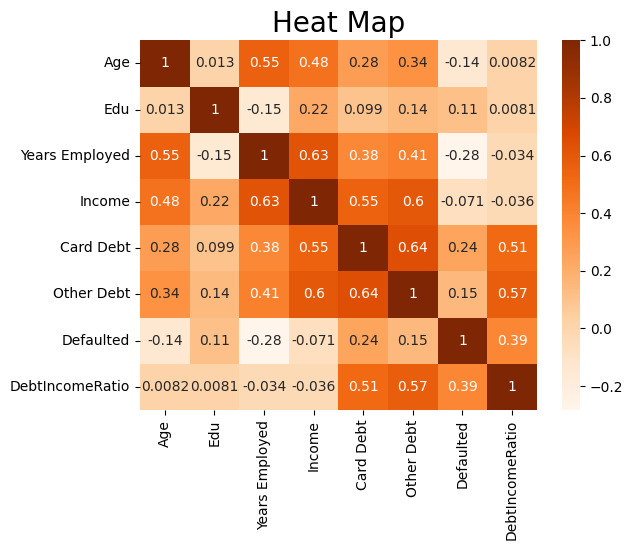

In [11]:
corr = df.corr(numeric_only=True)
corr

sns.heatmap(corr, cmap = 'Oranges', annot = True);

plt.title("Heat Map",fontsize = 20);

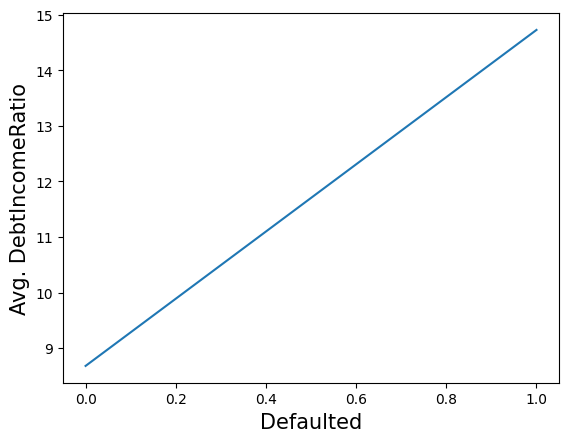

In [12]:
G2=df.groupby('Defaulted')[['DebtIncomeRatio']].mean()
G2=G2.sort_values('Defaulted',ascending=True)
G2=G2.reset_index()
G2
plt.plot(G2['Defaulted'],G2['DebtIncomeRatio'])
plt.style.use('ggplot');

plt.ylabel("Avg. DebtIncomeRatio", fontsize = 15);
plt.xlabel("Defaulted", fontsize = 15);


In [13]:
nulos = df['Defaulted'] == 1.0
df.loc[nulos,:].head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
2,33,2,10,57,6.111,5.802,1.0,20.9
10,44,3,8,88,0.285,5.083,1.0,6.1
14,28,3,2,20,0.233,1.647,1.0,9.4
22,28,3,6,47,5.574,3.732,1.0,19.8
32,23,2,0,42,1.019,0.619,1.0,3.9


In [14]:
nulos = df['Defaulted'] == 0.0
df.loc[nulos,:].head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
6,38,2,4,56,0.442,0.454,0.0,1.6


In [15]:
df['Defaulted'] = df.groupby('DebtIncomeRatio')['Defaulted'].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [16]:
df.isnull().sum()

Age                 0
Edu                 0
Years Employed      0
Income              0
Card Debt           0
Other Debt          0
Defaulted          16
DebtIncomeRatio     0
dtype: int64

In [17]:
nulos = df['Defaulted'].isnull()
df.loc[nulos,:].head(16)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
8,26,1,5,18,0.575,2.215,NaN,15.5
73,25,2,5,42,3.366,3.144,NaN,15.5
151,46,1,7,41,0.585,9.009,NaN,23.4
190,30,1,8,27,3.744,1.737,NaN,20.3
192,37,3,16,75,0.022,0.053,NaN,0.1
307,31,1,3,16,3.065,2.103,NaN,32.3
416,38,1,21,65,2.533,8.387,NaN,16.8
424,48,1,10,70,10.679,9.061,NaN,28.2
431,43,1,8,32,1.234,4.846,NaN,19.0
493,49,2,14,63,0.936,9.018,NaN,15.8


In [18]:
# We'll replace the missing values in the "Defaulted" column with random choices:

for i, value in enumerate(df["Defaulted"]):
  availabe_categories = df["Defaulted"].dropna().unique()
  if pd.isnull(value):  # Check if value is NaN
        random_choice = np.random.choice(availabe_categories)
        df.at[i, "Defaulted"] = random_choice

In [19]:
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [20]:
# I noticed that the "Defaulted" column might be a classifcation column so I'm going to delete it as well
df = df.drop(columns=["Defaulted"],axis=1)

In [21]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

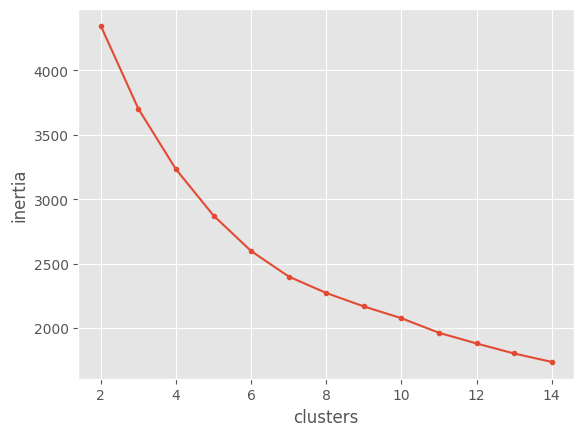

In [22]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 15 and store the inertias in the list.
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,15), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

# it seems like there should be 3 to 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

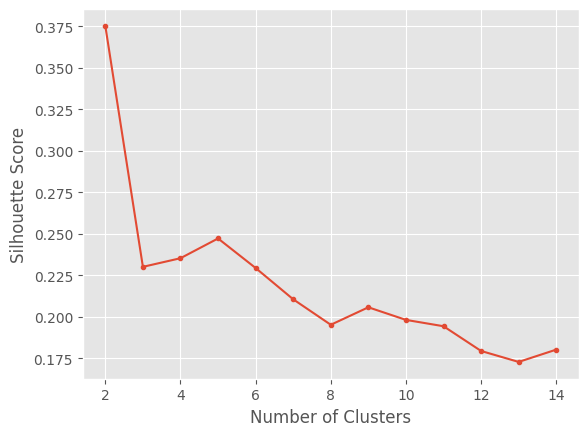

In [23]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 15), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

#The best result seems to be 3 but the result was 0.375 so the model doesn't seem to be working correctly

In [25]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.38115575548634506

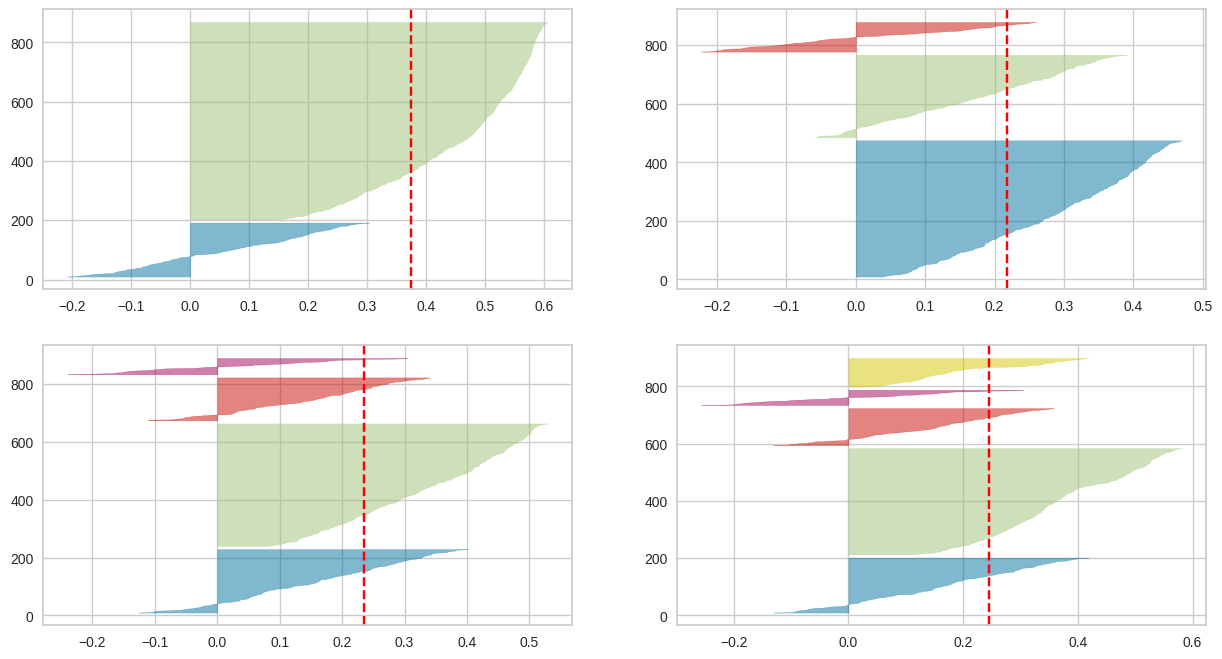

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for k in [2, 3, 4,5]:

    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)

# The results don't seem to be good so let's try to readjust the dataset

AttributeError: ignored

# Second Model

In [29]:
columns = ["Years Employed", "Income"]
df2 = df[columns]
df2.head()

,Years Employed,Income
0,6,19
1,26,100
2,10,57
3,4,19
4,31,253


In [34]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
df2 = scaler.fit_transform(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

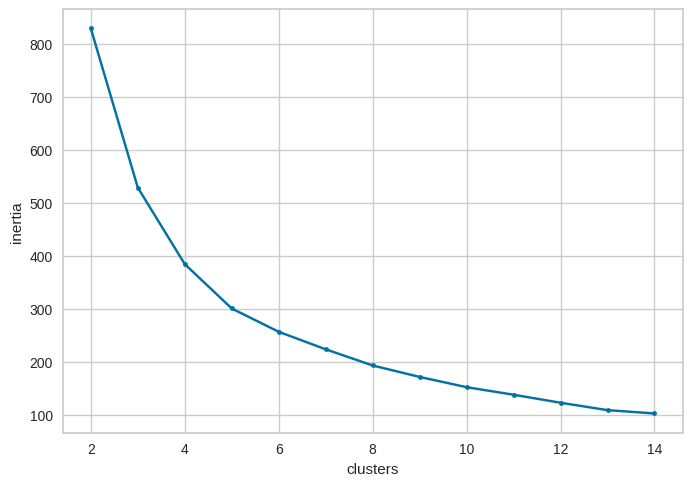

In [35]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 15 and store the inertias in the list.
for k in range(2,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,15), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

# it seems like there should be 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

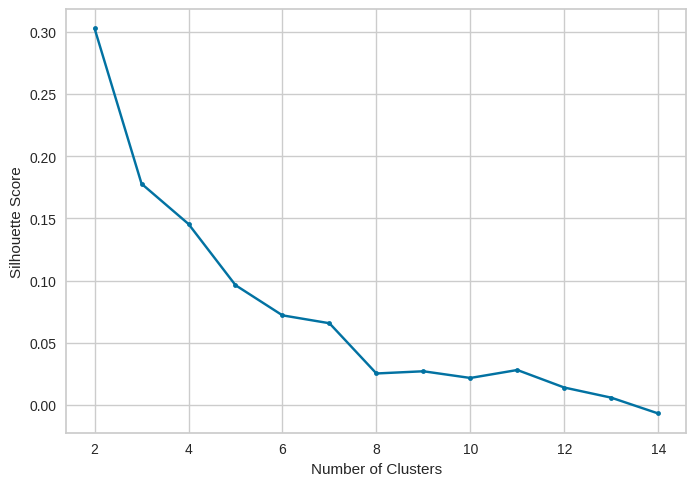

In [36]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 15), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');